<a href="https://colab.research.google.com/github/ecthon/01-fundamentos-nodejs/blob/main/Atividade01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#!pip3 install pandas --user

In [ ]:
vg = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
movies = pd.read_csv('Marvel_Movies_Dataset.csv')

**Quais gêneros tem mais jogos?**

In [ ]:
vg['Genre'].value_counts()

,count
Genre,
Action,3370
Sports,2348
Misc,1750
Role-Playing,1500
Shooter,1323
Adventure,1303
Racing,1249
Platform,888
Simulation,874


**Quais anos tiveram mais lançamentos?**

In [ ]:
vg['Year_of_Release'].value_counts().head(10)

,count
Year_of_Release,
2008.0,1427
2009.0,1426
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1006
2005.0,939
2002.0,829
2003.0,775


**Os cinco anos com mais lançamentos, com estes lançamentos divididos por gênero.**

In [ ]:
lancamentos_por_ano_genero = vg.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='Count')
top5_anos = lancamentos_por_ano_genero.groupby('Year_of_Release')['Count'].sum().sort_values(ascending=False).head(5).index
lancamentos_top5 = lancamentos_por_ano_genero[lancamentos_por_ano_genero['Year_of_Release'].isin(top5_anos)]
lancamentos_top5

,Year_of_Release,Genre,Count
267,2007.0,Action,210
268,2007.0,Adventure,83
269,2007.0,Fighting,50
270,2007.0,Misc,151
271,2007.0,Platform,42
272,2007.0,Puzzle,66
273,2007.0,Racing,84
274,2007.0,Role-Playing,103
275,2007.0,Shooter,85
276,2007.0,Simulation,90


**Faça um gráfico de anos por total de vendas globais.**

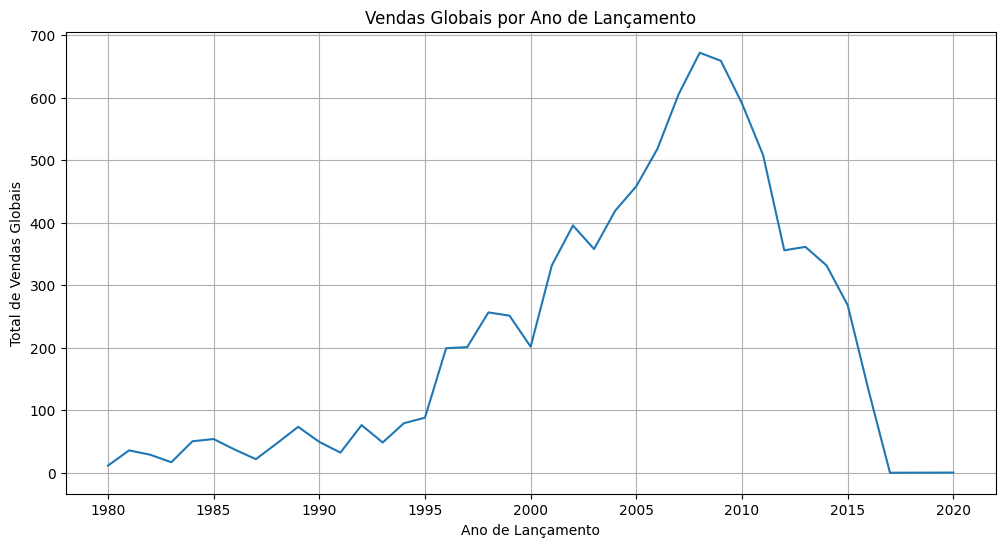

In [ ]:
vendas_por_ano = vg.groupby('Year_of_Release')['Global_Sales'].sum()

# Gerar gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_ano.index, vendas_por_ano.values)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Total de Vendas Globais')
plt.title('Vendas Globais por Ano de Lançamento')
plt.grid(True)
plt.show()

**Para cada ano, qual o gênero com mais lançamentos daquele ano.**

In [ ]:
lancamentos_por_ano_genero = vg.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='Count')
genero_mais_lancado_por_ano = lancamentos_por_ano_genero.loc[lancamentos_por_ano_genero.groupby('Year_of_Release')['Count'].idxmax()]
print(genero_mais_lancado_por_ano[['Year_of_Release', 'Genre', 'Count']])

     Year_of_Release         Genre  Count
2             1980.0          Misc      4
5             1981.0        Action     25
12            1982.0        Action     18
19            1983.0        Action      7
29            1984.0        Puzzle      3
35            1985.0      Platform      4
40            1986.0        Action      6
52            1987.0        Sports      4
54            1988.0      Platform      4
64            1989.0        Puzzle      5
68            1990.0        Action      3
85            1991.0        Sports      7
89            1992.0      Fighting      7
101           1993.0      Fighting     11
113           1994.0      Fighting     22
125           1995.0      Fighting     29
145           1996.0        Sports     52
157           1997.0        Sports     46
169           1998.0        Sports     70
181           1999.0        Sports     62
193           2000.0        Sports     81
205           2001.0        Sports     96
217           2002.0        Sports

**Para cada ano, qual foi o gênero mais _vendido_ daquele ano.**

In [ ]:
vendas_por_ano_genero = vg.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index(name='Total_Sales')
genero_mais_vendido_por_ano = vendas_por_ano_genero.loc[vendas_por_ano_genero.groupby('Year_of_Release')['Total_Sales'].idxmax()]
print(genero_mais_vendido_por_ano[['Year_of_Release', 'Genre', 'Total_Sales']])

     Year_of_Release         Genre  Total_Sales
3             1980.0       Shooter         7.07
5             1981.0        Action        14.84
15            1982.0        Puzzle        10.03
22            1983.0      Platform         6.93
31            1984.0       Shooter        31.10
35            1985.0      Platform        43.17
40            1986.0        Action        13.74
48            1987.0      Fighting         5.42
54            1988.0      Platform        27.73
64            1989.0        Puzzle        37.75
69            1990.0      Platform        22.97
79            1991.0      Platform         7.64
89            1992.0      Fighting        15.25
103           1993.0      Platform        18.67
115           1994.0      Platform        28.74
127           1995.0      Platform        16.69
142           1996.0  Role-Playing        43.96
153           1997.0        Racing        31.91
169           1998.0        Sports        41.79
178           1999.0  Role-Playing      

**Um gráfico contendo para cada plataforma, o número de vendas da mesma.**

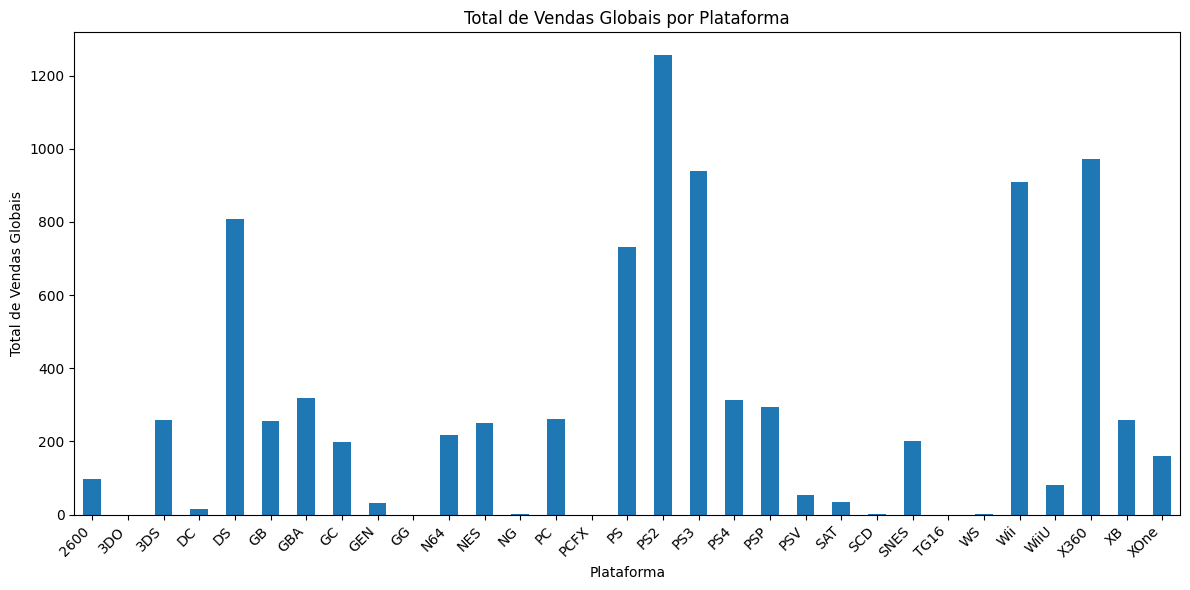

In [ ]:
vendas_por_plataforma = vg.groupby('Platform')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
vendas_por_plataforma.plot(kind='bar')
plt.xlabel('Plataforma')
plt.ylabel('Total de Vendas Globais')
plt.title('Total de Vendas Globais por Plataforma')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Faça uma tabela comparando, para cada gênero, as vendas globais, na américa do norte, europa e japão.**

In [ ]:
vendas_por_genero = vg.groupby('Genre').agg({'Global_Sales': 'sum', 'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum'})
vendas_por_genero

,Global_Sales,NA_Sales,EU_Sales,JP_Sales
Genre,,,,
Action,1745.27,879.01,519.13,161.44
Adventure,237.69,105.26,63.54,52.30
Fighting,447.48,223.36,100.33,87.48
Misc,803.18,407.27,212.74,108.11
Platform,828.08,445.50,200.35,130.83
Puzzle,243.02,122.87,50.01,57.31
Racing,728.90,359.35,236.51,56.71
Role-Playing,934.40,330.81,188.71,355.46
Shooter,1052.94,592.24,317.34,38.76


**Faça um gráfico de vendas por publisher.**

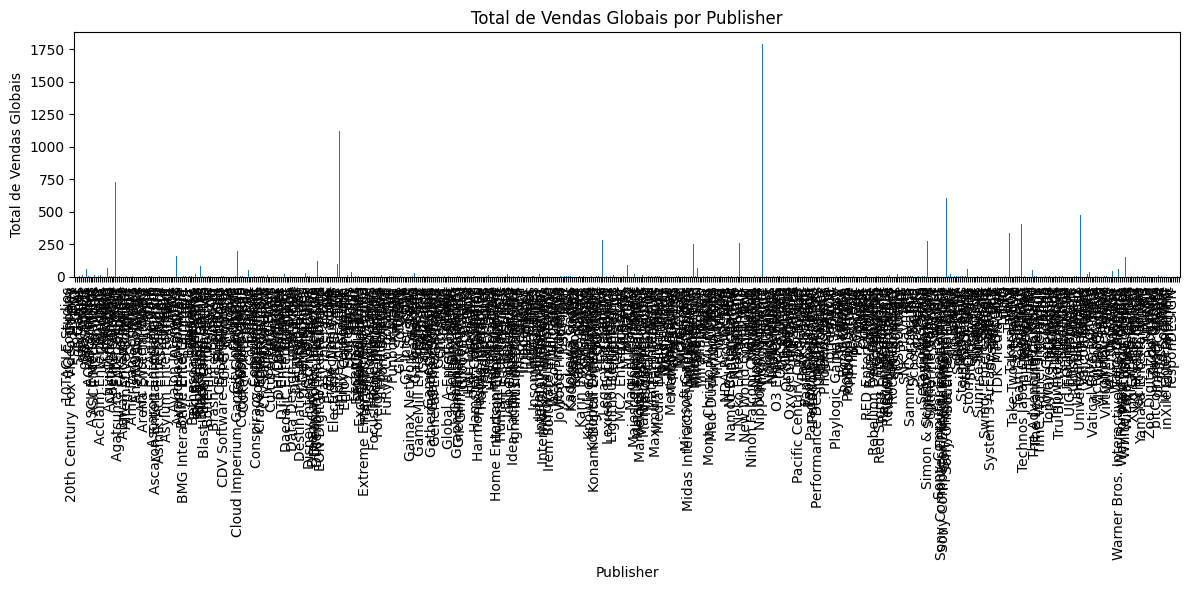

In [ ]:
vendas_por_publisher = vg.groupby('Publisher')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
vendas_por_publisher.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Total de Vendas Globais')
plt.title('Total de Vendas Globais por Publisher')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Faça uma tabela onde, para cada ano é listada a publisher com mais vendas globais naquele ano.**

In [ ]:
vendas_por_ano_publisher = vg.groupby(['Year_of_Release', 'Publisher'])['Global_Sales'].sum().reset_index()
publisher_mais_vendido_por_ano = vendas_por_ano_publisher.loc[vendas_por_ano_publisher.groupby('Year_of_Release')['Global_Sales'].idxmax()]
print(publisher_mais_vendido_por_ano[['Year_of_Release', 'Publisher', 'Global_Sales']])

      Year_of_Release                    Publisher  Global_Sales
1              1980.0                        Atari          8.36
3              1981.0                   Activision          8.50
19             1982.0                        Atari         19.43
36             1983.0                     Nintendo         10.96
41             1984.0                     Nintendo         45.56
47             1985.0                     Nintendo         49.95
53             1986.0                     Nintendo         16.18
60             1987.0                     Nintendo         11.95
67             1988.0                     Nintendo         36.44
75             1989.0                     Nintendo         63.88
82             1990.0                     Nintendo         35.49
97             1991.0                     Nintendo         15.97
114            1992.0                     Nintendo         38.11
138            1993.0                     Nintendo         20.04
180            1994.0    

**Qual filme teve o maior orçamento?**

In [ ]:
filme_maior_orcamento = movies.loc[movies['Budget (in million $)'].idxmax()]
print(f"Filme com maior orçamento: {filme_maior_orcamento['Title']}")
print(f"Orçamento: ${filme_maior_orcamento['Budget (in million $)']} milhões")

Filme com maior orçamento: Avengers: Infinity War
Orçamento: $400.0 milhões


**Qual é a média dos valores de IMDb para todos os filmes?**

In [ ]:
media_imdb = movies['IMDb (scored out of 10)'].mean()
print(f"Média dos valores de IMDb: {media_imdb:.2f}")

Média dos valores de IMDb: 7.24


**Quantos filmes possuem uma pontuação de Rotten Tomatoes - Critics maior que 80%?**

In [ ]:
filmes_criticos_acima_80 = (movies['Rotten Tomatoes - Critics (scored out of 100%)'] > 80).sum()
print(f"Número de filmes com pontuação de Rotten Tomatoes - Critics acima de 80%: {filmes_criticos_acima_80}")

Número de filmes com pontuação de Rotten Tomatoes - Critics acima de 80%: 19


**Quais diretores (diretor principal ou secundário) dirigiram mais de um filme no dataset?**

In [ ]:
# Combinar diretores em uma única série
todos_diretores = pd.concat([movies['Director (1)'], movies['Director (2)']])

# Contar a frequência de cada diretor
contagem_diretores = todos_diretores.value_counts()

# Filtrar diretores com mais de um filme
diretores_multiplos_filmes = contagem_diretores[contagem_diretores > 1]

print("Diretores que dirigiram mais de um filme:")
print(diretores_multiplos_filmes)

Diretores que dirigiram mais de um filme:
Anthony Russo    4
Joe Russo        4
Jon Watts        3
Peyton Reed      3
James Gunn       3
Ryan Coogler     2
Taika Waititi    2
Jon Favreau      2
Joss Whedon      2
Name: count, dtype: int64


**Qual é a correlação entre o orçamento e o lucro bruto doméstico?**

In [ ]:
correlacao = movies['Budget (in million $)'].corr(movies['Domestic Gross (in million $)'])
print(f"Correlação entre orçamento e lucro bruto doméstico: {correlacao:.4f}")

Correlação entre orçamento e lucro bruto doméstico: 0.3573


Quais filmes obtiveram um CinemaScore A+?

In [ ]:
filmes_a_plus = movies[movies['CinemaScore (grades A+ to F)'] == 'A+']

if len(filmes_a_plus) > 0:
    print("Filmes com CinemaScore A+:")
    print(filmes_a_plus['Title'].tolist())
else:
    print("Não há filmes com CinemaScore A+ neste conjunto de dados.")

Filmes com CinemaScore A+:
['The Avengers', 'Black Panther', 'Avengers: Endgame', 'Spider-Man: No Way Home']


**Qual foi o filme com a maior pontuação no Letterboxd?**

In [ ]:
filme_maior_letterboxd = movies.loc[movies['Letterboxd (scored out of 5)'].idxmax()]
print(f"Filme com maior pontuação no Letterboxd: {filme_maior_letterboxd['Title']}")
print(f"Pontuação: {filme_maior_letterboxd['Letterboxd (scored out of 5)']} de 5")

Filme com maior pontuação no Letterboxd: Avengers: Infinity War
Pontuação: 4.0 de 5


**Quantos filmes têm um lucro bruto mundial superior a 500 milhões de dólares?**

In [ ]:
filmes_lucro_mundial_acima_500 = (movies['Worldwide Gross (in million $)'] > 500).sum()
print(f"Número de filmes com lucro bruto mundial superior a 500 milhões de dólares: {filmes_lucro_mundial_acima_500}")

Número de filmes com lucro bruto mundial superior a 500 milhões de dólares: 26


**Qual foi o filme mais bem avaliado em Rotten Tomatoes - Critics e Rotten Tomatoes - Audience juntos?**

In [ ]:
# Criar uma nova coluna com a soma das pontuações de Rotten Tomatoes
movies['Rotten Tomatoes Total'] = movies['Rotten Tomatoes - Critics (scored out of 100%)'] + movies['Rotten Tomatoes - Audience (scored out of 100%)']

# Encontrar o filme com a maior pontuação total
filme_mais_bem_avaliado = movies.loc[movies['Rotten Tomatoes Total'].idxmax()]

print(f"Filme mais bem avaliado no Rotten Tomatoes:")
print(f"Título: {filme_mais_bem_avaliado['Title']}")
print(f"Pontuação dos Críticos: {filme_mais_bem_avaliado['Rotten Tomatoes - Critics (scored out of 100%)']}%")
print(f"Pontuação do Público: {filme_mais_bem_avaliado['Rotten Tomatoes - Audience (scored out of 100%)']}%")
print(f"Pontuação Total: {filme_mais_bem_avaliado['Rotten Tomatoes Total']}%")

Filme mais bem avaliado no Rotten Tomatoes:
Título: Spider-Man: No Way Home
Pontuação dos Críticos: 93%
Pontuação do Público: 98%
Pontuação Total: 191%


**Qual é a distribuição dos orçamentos dos filmes (mínimo, máximo, quartis)?**

In [ ]:
distribuicao_orcamentos = movies['Budget (in million $)'].describe()
print("Distribuição dos Orçamentos (em milhões de $):")
print(distribuicao_orcamentos)

Distribuição dos Orçamentos (em milhões de $):
count     34.000000
mean     229.523529
std       69.004243
min      140.000000
25%      183.750000
50%      200.000000
75%      250.000000
max      400.000000
Name: Budget (in million $), dtype: float64


**Quais são os 5 filmes mais antigos no dataset?**

In [ ]:
movies['Release Date (DD-MM-YYYY)'] = pd.to_datetime(movies['Release Date (DD-MM-YYYY)'])

# Ordenar os filmes pela data de lançamento
filmes_mais_antigos = movies.sort_values('Release Date (DD-MM-YYYY)').head(5)

print("Os 5 filmes mais antigos:")
for index, filme in filmes_mais_antigos.iterrows():
    print(f"{filme['Title']} - Lançado em {filme['Release Date (DD-MM-YYYY)'].strftime('%d-%m-%Y')}")

Os 5 filmes mais antigos:
Iron Man - Lançado em 02-05-2008
The Incredible Hulk - Lançado em 13-06-2008
Iron Man 2 - Lançado em 07-05-2010
Thor - Lançado em 06-05-2011
Captain America: The First Avenger - Lançado em 22-07-2011


**Qual é a relação entre o IMDb Metascore e o Rotten Tomatoes - Critics?**

Correlação entre IMDb Metascore e Rotten Tomatoes - Critics: 0.8905


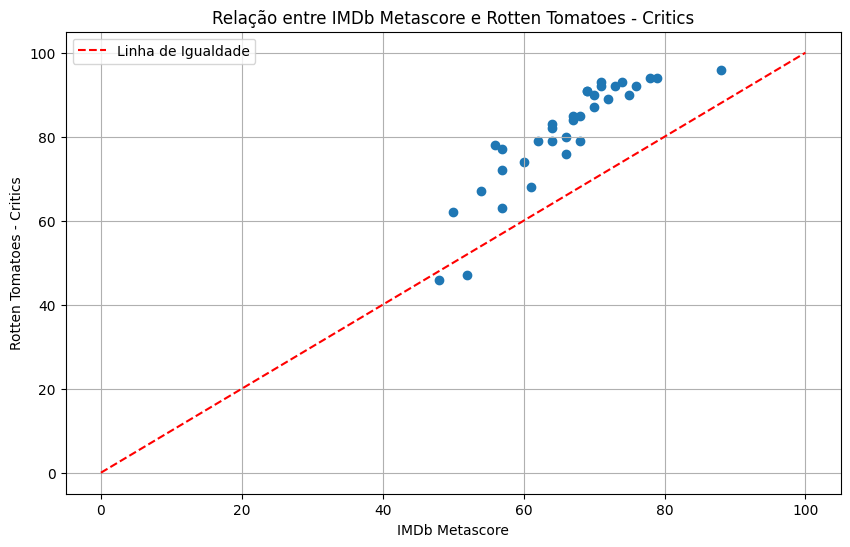

In [ ]:
# Calcular a correlação
correlacao = movies['IMDB Metascore (scored out of 100)'].corr(movies['Rotten Tomatoes - Critics (scored out of 100%)'])

print(f"Correlação entre IMDb Metascore e Rotten Tomatoes - Critics: {correlacao:.4f}")

# Criar um gráfico de dispersão
plt.figure(figsize=(10,6))
plt.scatter(movies['IMDB Metascore (scored out of 100)'], movies['Rotten Tomatoes - Critics (scored out of 100%)'])
plt.xlabel('IMDb Metascore')
plt.ylabel('Rotten Tomatoes - Critics')
plt.title('Relação entre IMDb Metascore e Rotten Tomatoes - Critics')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Linha de Igualdade')
plt.legend()
plt.grid(True)
plt.show()

**Quais filmes tiveram mais sucesso mundial (Worldwide Gross) em relação ao seu orçamento?**

In [ ]:
movies['ROI'] = (movies['Worldwide Gross (in million $)'] - movies['Budget (in million $)']) / movies['Budget (in million $)'] * 100
filmes_por_roi = movies.sort_values('ROI', ascending=False)

print("Filmes classificados por Retorno sobre Investimento (ROI):")
for index, filme in filmes_por_roi.iterrows():
    print(f"{filme['Title']}:")
    print(f"  Orçamento: ${filme['Budget (in million $)']} milhões")
    print(f"  Receita Mundial: ${filme['Worldwide Gross (in million $)']} milhões")
    print(f"  ROI: {filme['ROI']:.2f}%")
    print()

Filmes classificados por Retorno sobre Investimento (ROI):
Spider-Man: No Way Home:
  Orçamento: $200.0 milhões
  Receita Mundial: $1952.0 milhões
  ROI: 876.00%

Spider-Man: Far From Home:
  Orçamento: $160.0 milhões
  Receita Mundial: $1133.0 milhões
  ROI: 608.12%

Avengers: Endgame:
  Orçamento: $400.0 milhões
  Receita Mundial: $2799.0 milhões
  ROI: 599.75%

The Avengers:
  Orçamento: $225.0 milhões
  Receita Mundial: $1521.0 milhões
  ROI: 576.00%

Black Panther:
  Orçamento: $200.0 milhões
  Receita Mundial: $1350.0 milhões
  ROI: 575.00%

Deadpool & Wolverine:
  Orçamento: $200.0 milhões
  Receita Mundial: $1338.0 milhões
  ROI: 569.00%

Captain Marvel:
  Orçamento: $175.0 milhões
  Receita Mundial: $1131.0 milhões
  ROI: 546.29%

Iron Man 3:
  Orçamento: $200.0 milhões
  Receita Mundial: $1215.0 milhões
  ROI: 507.50%

Avengers: Infinity War:
  Orçamento: $400.0 milhões
  Receita Mundial: $2052.0 milhões
  ROI: 413.00%

Spider-Man: Homecoming:
  Orçamento: $175.0 milhões
  Re

**Qual foi a média de Rotten Tomatoes - Audience para os filmes lançados antes de 2010?**

In [ ]:
# Converter a coluna de data para datetime
movies['Release Date (DD-MM-YYYY)'] = pd.to_datetime(movies['Release Date (DD-MM-YYYY)'])

# Filtrar filmes lançados antes de 2010
filmes_antes_2010 = movies[movies['Release Date (DD-MM-YYYY)'].dt.year < 2010]

# Calcular a média de Rotten Tomatoes - Audience para esses filmes
media_audience_antes_2010 = filmes_antes_2010['Rotten Tomatoes - Audience (scored out of 100%)'].mean()

print("Filmes lançados antes de 2010:")
for index, filme in filmes_antes_2010.iterrows():
    print(f"{filme['Title']} - Lançado em {filme['Release Date (DD-MM-YYYY)'].strftime('%d-%m-%Y')}, Rotten Tomatoes Audience: {filme['Rotten Tomatoes - Audience (scored out of 100%)']}")

print(f"\nMédia de Rotten Tomatoes - Audience para filmes antes de 2010: {media_audience_antes_2010:.2f}%")

Filmes lançados antes de 2010:
Iron Man - Lançado em 02-05-2008, Rotten Tomatoes Audience: 91
The Incredible Hulk - Lançado em 13-06-2008, Rotten Tomatoes Audience: 69

Média de Rotten Tomatoes - Audience para filmes antes de 2010: 80.00%


**Quantos filmes no dataset possuem dois diretores listados?**

In [ ]:
filmes_dois_diretores = movies[movies['Director (2)'].notna()]
num_filmes_dois_diretores = len(filmes_dois_diretores)
print(f"Número de filmes com dois diretores listados: {num_filmes_dois_diretores}")

Número de filmes com dois diretores listados: 5
